In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls "/content/drive/My Drive/datasets/UcClass"

In [7]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense 
#from keras import backend as K 

train_dir = '/content/drive/My Drive/datasets/UcClass/train'
validation_dir = '/content/drive/My Drive/datasets/UcClass/val'

model = Sequential() 
model.add(Conv2D(128, (2, 2), input_shape = (224, 224, 3))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 

model.add(Conv2D(128, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 

model.add(Conv2D(64, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 

model.add(Flatten()) 
model.add(Dense(64)) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(3)) 
model.add(Activation('softmax'))

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
 
train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=32,
    class_mode='categorical',
    target_size=(224,224))
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    batch_size=32,
    shuffle=False,
    class_mode='categorical',
    target_size=(224,224))

optimizer = tf.keras.optimizers.RMSprop(lr=1e-4)
#optimizer = tf.keras.optimizers.Adam(lr=1e-4)
#optimizer = tf.keras.optimizers.Adamax(lr=1e-2, beta_1=0.9, beta_2=0.999)
#optimizer = tf.keras.optimizers.Adadelta(lr=1.0, rho=0.95)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

model.summary()



Found 4640 images belonging to 3 classes.
Found 1163 images belonging to 3 classes.
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 223, 223, 128)     1664      
_________________________________________________________________
activation_25 (Activation)   (None, 223, 223, 128)     0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 111, 111, 128)     0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 110, 110, 128)     65664     
_________________________________________________________________
activation_26 (Activation)   (None, 110, 110, 128)     0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 55, 55, 128)       0         
____________________________________

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
145/145 [==============================] - 2725s 19s/step - loss: 0.8922 - accuracy: 0.5873 - val_loss: 0.7556 - val_accuracy: 0.7023
Epoch 2/50
145/145 [==============================] - 167s 1s/step - loss: 0.7782 - accuracy: 0.6662 - val_loss: 0.6891 - val_accuracy: 0.7370
Epoch 3/50
145/145 [==============================] - 163s 1s/step - loss: 0.7448 - accuracy: 0.6946 - val_loss: 0.7266 - val_accuracy: 0.7205
Epoch 4/50
145/145 [==============================] - 162s 1s/step - loss: 0.7191 - accuracy: 0.7091 - val_loss: 0.6474 - val_accuracy: 0.7457
Epoch 5/50
145/145 [==============================] - 157s 1s/step - loss: 0.6959 - accuracy: 0.7170 - val_loss: 0.7776 - val_accuracy: 0.7023
Epoch 6/50
145/145 [==============================] - 155s 1s/step - loss: 0.6746 - accuracy: 0.7220 - val_loss: 0.6119 - val_accuracy: 0.7622
Epoch 7/50
145/145 [==============================] - 154s 1s/st

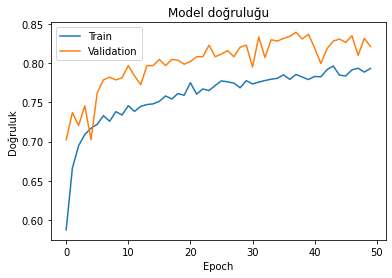

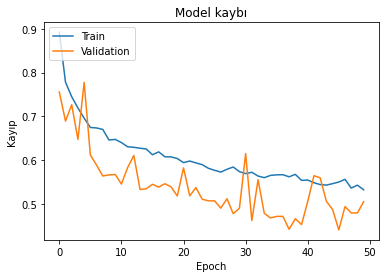

In [8]:
history = model.fit_generator(
    generator=train_generator,
    validation_data=validation_generator,
    steps_per_epoch=train_generator.n//train_generator.batch_size, 
    validation_steps=validation_generator.n//validation_generator.batch_size,
    epochs=50)

model.save('/content/drive/My Drive/datasets/UcClass/customModel3RmspropE50.h5')

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model doğruluğu')
plt.ylabel('Doğruluk')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model kaybı')
plt.ylabel('Kayıp')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
